# **Projeto Final**

## **Extração de características**

### **Alunos:**

 - Kariston Stevan Luiz
 - Anderson Salata
 - Edson Alves

## **Dataset**

**Identificação de sequências SARS-CoV-2 de outros vírus**

Aqui, realizamos um teste experimental, mas agora classificando a SARS-CoV-2 de outros vírus (por exemplo, HIV, gripe, hepatite, ebolavírus, SARS, etc). Assim, obtemos um conjunto de dados final com **22.442** e **2.373** sequências de outros vírus e SARS-CoV-2, respectivamente.


## **Trabalho**

Use o dataset **other_viruses_covid.csv** para construir um modelo de classificação de sequências de COVID-19 com modelos ensemble, avaliação por curva ROC e etc.

**Use Holdout para validar o modelo.**

1 - Decida que padronização dos dados usará (ou nenhuma). Justifique.

2 - Aplique uma técnica para dados desbalanceados (ver aquivo **Imbalanced data sets**).

3 - Aplique alguma técnica de Redução de Dimensionalidade.

4 - Utilize pelo menos 5 classificadores (linear, não linear, ensembles, clássicos).

5 - Apresente 4 métricas de performance

6 - Reporte a curva ROC cada algoritmo.

7 - Finalmente, discorra rapidamente sobre os experimentos e resultados (qual o melhor classificador, ...).

**Caso ainda tenha dúvida de como montar um modelo de classificação, procure o no conteúdo complementar da disciplina.**

## **Importando as Bibliotecas**

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import cycle
from sklearn.model_selection import train_test_split
from google.colab import files
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_breast_cancer

## **Carregando dataset**

In [22]:
df1=pd.read_csv("/content/SARS-COV-2.csv")
df2=pd.read_csv("/content/other_viruses.csv")

df1
df2

,nameseq,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,percentile25,percentile50,percentile75,amplitude,variance,interquartile_range,semi_interquartile_range,coefficient_of_variation,skewness,kurtosis,label
0,KM403634.1,1.162229e+10,1.794215e+06,8.975852e+13,5.948627e+05,3.072831e-07,0.351056,8.790711e+11,8.791122e+11,9.628583e+05,1.060685e+06,1.794215e+06,6.067291e+06,8.975852e+13,7.728382e+23,5.006607e+06,2.503303e+06,75.636665,0.039657,0.071372,0
1,KJ672616.1,1.378855e+11,1.381194e+07,1.554990e+15,6.256875e+06,3.707183e-08,0.171302,1.272177e+13,1.272219e+13,7.354419e+06,8.109142e+06,1.381194e+07,4.739088e+07,1.554990e+15,1.618540e+26,3.928174e+07,1.964087e+07,92.263337,0.032512,0.070595,0
2,MT190900.1,2.152877e+10,2.950305e+06,1.464793e+14,1.241002e+06,1.397355e-07,0.214417,1.559620e+12,1.559706e+12,1.561668e+06,1.718361e+06,2.950305e+06,9.976010e+06,1.464793e+14,2.432683e+24,8.257649e+06,4.128824e+06,72.443512,0.041406,0.070830,0
3,MK850457.1,2.106247e+10,3.098383e+06,1.412120e+14,1.292456e+06,1.418162e-07,0.209332,1.509815e+12,1.509900e+12,1.651399e+06,1.816420e+06,3.098383e+06,1.045842e+07,1.412120e+14,2.279797e+24,8.642005e+06,4.321003e+06,71.682744,0.041845,0.069899,0
4,KT991433.1,1.780693e+08,5.749116e+04,4.394072e+11,1.147890e+04,6.014512e-06,0.707181,7.819467e+09,7.820684e+09,3.047195e+04,3.511991e+04,5.749116e+04,2.017980e+05,4.394072e+11,6.116309e+19,1.666781e+05,8.333906e+04,43.912490,0.068296,0.073135,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,MK033771.1,2.974035e+10,3.247982e+06,3.105287e+14,1.304681e+06,1.713161e-07,0.385448,2.571010e+12,2.571094e+12,1.740997e+06,1.915248e+06,3.247982e+06,1.112146e+07,3.105287e+14,6.610526e+24,9.206207e+06,4.603103e+06,86.448567,0.034699,0.071653,0
1996,MK658832.1,7.383089e+08,2.020925e+05,3.682454e+12,5.144689e+04,3.359028e-06,0.767230,4.373988e+10,4.374282e+10,1.055342e+05,1.218159e+05,2.020925e+05,6.953082e+05,3.682454e+12,1.913434e+21,5.734923e+05,2.867462e+05,59.243339,0.050625,0.069661,0
1997,KJ170486.1,1.180282e+09,3.466039e+05,4.769887e+12,8.589220e+04,2.086507e-06,0.520852,5.971864e+10,5.972268e+10,1.844212e+05,2.088759e+05,3.466039e+05,1.186185e+06,4.769887e+12,3.566799e+21,9.773095e+05,4.886547e+05,50.596918,0.059275,0.069724,0
1998,MN829875.1,1.221524e+10,2.212440e+06,7.284888e+13,9.165548e+05,2.150046e-07,0.290119,8.289242e+11,8.289768e+11,1.184899e+06,1.306747e+06,2.212440e+06,7.647498e+06,7.284888e+13,6.872025e+23,6.340751e+06,3.170375e+06,67.859831,0.044201,0.070792,0


## **Concatenando os datasets**

In [23]:
df=pd.concat([df1,df2])
df

,nameseq,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,percentile25,percentile50,percentile75,amplitude,variance,interquartile_range,semi_interquartile_range,coefficient_of_variation,skewness,kurtosis,label
0,NC_045512.2,5.579451e+11,2.648017e+07,1.220395e+16,1.191188e+07,1.786496e-08,0.299224,7.154604e+13,7.154724e+13,1.407346e+07,1.548790e+07,2.648017e+07,9.028400e+07,1.220395e+16,5.119007e+27,7.479610e+07,3.739805e+07,128.231324,0.023394,0.070657,1
1,MT483553.1,5.543411e+11,2.615915e+07,1.208747e+16,1.172602e+07,1.791917e-08,0.297939,7.098157e+13,7.098276e+13,1.394449e+07,1.533959e+07,2.615915e+07,8.984881e+07,1.208747e+16,5.038552e+27,7.450922e+07,3.725461e+07,128.046734,0.023428,0.070937,1
2,MT483554.1,5.550479e+11,2.623601e+07,1.209842e+16,1.175014e+07,1.789635e-08,0.297443,7.104835e+13,7.104954e+13,1.397991e+07,1.537933e+07,2.623601e+07,8.996633e+07,1.209842e+16,5.048037e+27,7.458700e+07,3.729350e+07,128.004004,0.023436,0.070986,1
3,MT483555.1,5.514714e+11,2.599594e+07,1.200343e+16,1.174705e+07,1.798643e-08,0.297646,7.053957e+13,7.054075e+13,1.387876e+07,1.528127e+07,2.599594e+07,8.869318e+07,1.200343e+16,4.975998e+27,7.341191e+07,3.670596e+07,127.911554,0.023453,0.070527,1
4,MT483556.1,5.554361e+11,2.625292e+07,1.210662e+16,1.176036e+07,1.788385e-08,0.297301,7.109687e+13,7.109806e+13,1.398594e+07,1.538856e+07,2.625292e+07,9.005438e+07,1.210662e+16,5.054934e+27,7.466582e+07,3.733291e+07,128.001885,0.023436,0.070987,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,MK033771.1,2.974035e+10,3.247982e+06,3.105287e+14,1.304681e+06,1.713161e-07,0.385448,2.571010e+12,2.571094e+12,1.740997e+06,1.915248e+06,3.247982e+06,1.112146e+07,3.105287e+14,6.610526e+24,9.206207e+06,4.603103e+06,86.448567,0.034699,0.071653,0
1996,MK658832.1,7.383089e+08,2.020925e+05,3.682454e+12,5.144689e+04,3.359028e-06,0.767230,4.373988e+10,4.374282e+10,1.055342e+05,1.218159e+05,2.020925e+05,6.953082e+05,3.682454e+12,1.913434e+21,5.734923e+05,2.867462e+05,59.243339,0.050625,0.069661,0
1997,KJ170486.1,1.180282e+09,3.466039e+05,4.769887e+12,8.589220e+04,2.086507e-06,0.520852,5.971864e+10,5.972268e+10,1.844212e+05,2.088759e+05,3.466039e+05,1.186185e+06,4.769887e+12,3.566799e+21,9.773095e+05,4.886547e+05,50.596918,0.059275,0.069724,0
1998,MN829875.1,1.221524e+10,2.212440e+06,7.284888e+13,9.165548e+05,2.150046e-07,0.290119,8.289242e+11,8.289768e+11,1.184899e+06,1.306747e+06,2.212440e+06,7.647498e+06,7.284888e+13,6.872025e+23,6.340751e+06,3.170375e+06,67.859831,0.044201,0.070792,0


## **Dividindo em x e y**

In [24]:
X = np.array(df.iloc[:,1 :-1])
y = np.array(df.iloc[:, -1])

X
y

array([1, 1, 1, ..., 0, 0, 0])

## **Quantidade de amostras por classe**

In [25]:
from collections import Counter

print('Dataset shape %s' % Counter(y))

Dataset shape Counter({0: 2000, 1: 1314})


## **Utilizando Holdout para dividir os dados em treino e teste**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

## **Escalando os Dados**

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Reduzindo a Dimensionalidade**

In [29]:
# Código Aqui!
from sklearn.decomposition import PCA

pca = PCA(n_components=3) #numero de dimensoes/caracteristicas/atributos/colunas

train_pca = pca.fit_transform(X_train)
test_pca = pca.transform(X_test)

pca.explained_variance_ratio_ #poder de explicacao da variancia dessas dimensoes, representam o dataset original
sum(pca.explained_variance_ratio_)

0.9669322126263253

In [30]:
train_pca

array([[ 0.10283811, -1.40063589, -0.37409559],
       [ 4.69021856,  0.22658761,  0.1854594 ],
       [ 4.63039287,  0.22282367,  0.06748867],
       ...,
       [-4.28996706,  1.41273378, -0.79525398],
       [-2.23342465, -1.72083153,  0.00561588],
       [-4.32057357,  1.07142126,  1.62502962]])

## **Aplicando Técnicas para dados desbalanceados**

In [31]:
# Código Aqui!
from imblearn.under_sampling import RandomUnderSampler

rs = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rs.fit_resample(train_pca, y_train)
print('dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_train_res))

dataset shape Counter({0: 1400, 1: 919})
Resampled dataset shape Counter({0: 919, 1: 919})


## **Função para plotar ROC curve - Está pronta - Apenas executar**

In [32]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

def save_results(result_table, classifier, test_labels, pred_proba, pos_label = 1):
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, pred_proba, pos_label)
    auc = roc_auc_score(test_labels, pred_proba)
    result_table = result_table.append({'classifier': classifier,
                                          'fpr':fpr, 
                                          'tpr':tpr, 
                                          'auc':auc}, ignore_index=True)
    return result_table


def roc_curve(result_table):
    result_table.set_index('classifier', inplace=True)
    fig = plt.figure(figsize=(8,6))

    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'], 
                result_table.loc[i]['tpr'], 
                label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
        
    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':12}, loc='lower right')

    plt.show()
    fig.savefig('multiple_roc_curve.pdf')
    # files.download('multiple_roc_curve.pdf') 

## **Crie um dicionário com pelo menos 5 classificadores -  Escolha pelo menos 2 classificadores ensemble**

In [33]:
# Código Aqui!
from sklearn.ensemble import VotingClassifier, StackingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neural_network import MLPClassifier

experiments_alg = {
    "KNN" : KNeighborsClassifier(n_neighbors = 5, algorithm= 'kd_tree'),

    # "Classifier 2" : Classifier() # DT
    "DecisionTreeClassifier" : tree.DecisionTreeClassifier(),

    # "Classifier 3" : Classifier() # MLP
    "MLP" : MLPClassifier(random_state=1, max_iter=300),

    # "Classifier 4" : Classifier() # Naive Bayes
    "GaussianNB" : GaussianNB(),

    #adicionar baggin, adaboost
    "BaggingClassifier" : BaggingClassifier(base_estimator=None, n_estimators=10, random_state=0),

    "AdaBoostClassifier" : AdaBoostClassifier(n_estimators=100, random_state=0)
  
}

## **Avalie cada classificador no conjunto de teste - Print pelo menos quatro métricas e.g., accuracy, MCC, Kappa**

In [34]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

result_table = pd.DataFrame(columns=['classifier', 'fpr','tpr','auc'])

for classifier, model in experiments_alg.items():
    # Chame o modelo
    model = model

    # Fit no train
    model.fit(X_train_res, y_train_res)
   
    # Predict no test
    preds = model.predict(test_pca)
    
    # Gere as probabilidade
    #predict_proba(self, X)[source]¶
    pred_proba = model.predict_proba(test_pca)[:,1]

    # Calcule alguma métrica, e.g. ACC
    acc = accuracy_score(y_test, preds)

    print("Resultado do %s: %s" % (classifier, acc))

    # Gerando resultados para curva ROC
    #result_table = save_results(result_table, classifier, y_test, pred_proba, pos_label = 1)
    result_table = save_results(result_table, classifier, y_test, pred_proba)

Resultado do KNN: 0.9989949748743718
Resultado do DecisionTreeClassifier: 0.9989949748743718
Resultado do MLP: 0.9979899497487437
Resultado do GaussianNB: 1.0
Resultado do BaggingClassifier: 0.9989949748743718
Resultado do AdaBoostClassifier: 0.9989949748743718


## **Plotando Curva ROC**

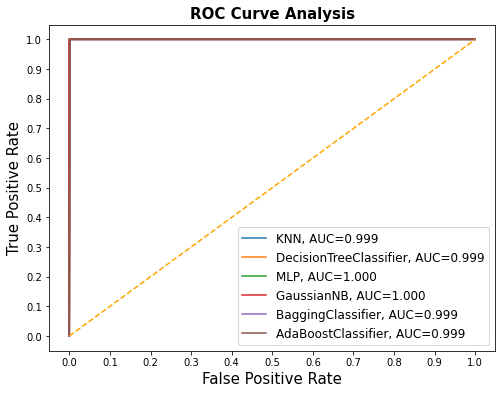

In [35]:
roc_curve(result_table)

## **Discuta os resultados**

------
Concluímos que este problema (classificar um vírus se é ou na COVID) é linearmente separável, pois todos os classificadores obtiveram quase 100% de acurácia.